# Affinity Propagation Model

## Imports

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn import cluster as c
from sklearn import metrics as mt

## Dataset

In [ ]:
X = pd.read_csv("/home/ds_deivisson/repos/datasets/X_dataset_clusterizacao.csv")

## Treinamento do modelo

In [17]:
p = np.arange(-1, -61, -1)
ss_list = []
n_clusters_list = []

for pref in p:
    model = c.AffinityPropagation(preference=pref)

    model.fit(X)
    labels = model.labels_

    n_clusters = len(np.unique(labels))
    n_clusters_list.append(n_clusters)

    if n_clusters > 1:
        ss = mt.silhouette_score(X, labels)
    else:
        ss = np.nan

    ss_list.append(ss)

    print(f"Preference: {pref} | Clusters: {n_clusters} | SS: {ss}")

Preference: -1 | Clusters: 155 | SS: 0.04666257505013329
Preference: -2 | Clusters: 86 | SS: 0.1214706762258716
Preference: -3 | Clusters: 62 | SS: 0.14804305972434378
Preference: -4 | Clusters: 45 | SS: 0.15687895510371894
Preference: -5 | Clusters: 41 | SS: 0.16449333828102514
Preference: -6 | Clusters: 35 | SS: 0.16484123437492035
Preference: -7 | Clusters: 31 | SS: 0.17358341722326004
Preference: -8 | Clusters: 29 | SS: 0.1681457668153563
Preference: -9 | Clusters: 27 | SS: 0.1708976628069641
Preference: -10 | Clusters: 25 | SS: 0.17126814951754354
Preference: -11 | Clusters: 21 | SS: 0.17179302803695015
Preference: -12 | Clusters: 18 | SS: 0.16895828713435324
Preference: -13 | Clusters: 17 | SS: 0.1693882248493382
Preference: -14 | Clusters: 16 | SS: 0.1689302490648782
Preference: -15 | Clusters: 13 | SS: 0.1609957381702741
Preference: -16 | Clusters: 12 | SS: 0.15989761582747777
Preference: -17 | Clusters: 12 | SS: 0.15989761582747777
Preference: -18 | Clusters: 12 | SS: 0.155489

## Gráfico Silhouette Score X Preference

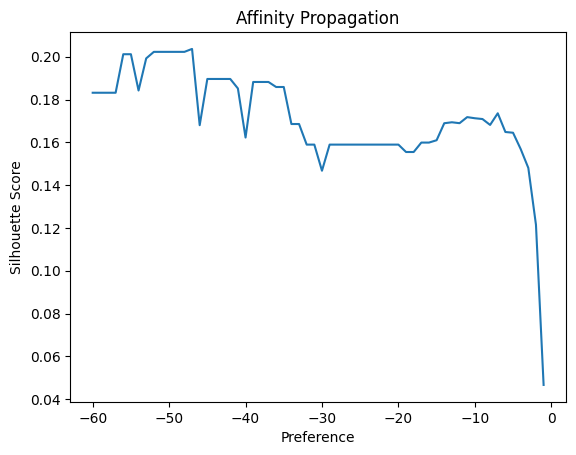

In [18]:
plt.plot(p, ss_list)
plt.xlabel("Preference")
plt.ylabel("Silhouette Score")
plt.title("Affinity Propagation")
plt.show()

## Definição do número de clusters

In [19]:
p_best = ss_list.index(max(ss_list))
af = c.AffinityPropagation(preference = p[p_best])
af.fit(X)
labels = af.predict(X)
print(f'Número de clusters encontrados: {len(np.unique(labels))}')
print(f'silhouete score: {max(ss_list):.3f}')

Número de clusters encontrados: 7
silhouete score: 0.204
